# 📩 **SMS Spam Detector**

### 📚 **Importing all necessary libraries**

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()
import string

from sklearn.metrics import classification_report, roc_auc_score

In [2]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import pickle

# 📂 **Creating the dataframe**

In [4]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 🧹**Data cleaning** 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# We only have three columns that are unnecessary, so it's best to drop them 
# Drop the columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
# Missing values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
# Check for duplicates values
df.duplicated().sum()

403

In [10]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [11]:
df.shape

(5169, 2)

##  **Exploratory Data Analysis**

In [12]:
df['v1'].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

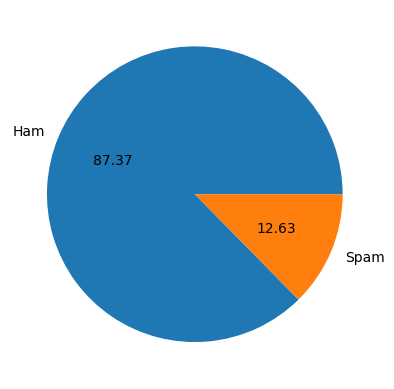

In [13]:
plt.pie(df['v1'].value_counts(), labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

- the data is imbalanced

## 🔎 **Data Processing**

## **Lower Case , Tokenization , Removing special characters,Stop words and punctuation , Stemming** 

In [14]:
def transform(text):
    #Lower Case
    text = text.lower()
    #Tokenization
    text = nltk.word_tokenize(text)
    #Special Characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    #Stop words and punctuation
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)        

    #Stemming
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))        
    return " ".join(y)       


In [15]:
df['Message'] = df['v2'].apply(transform)
df.drop(['v2'],axis=1,inplace=True)
df.head()

,v1,Message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


In [16]:
# Encoding the Label feature 
df.loc[df['v1'] == 'spam', 'v1'] = 0
df.loc[df['v1'] == 'ham', 'v1'] = 1
df.head(10)

,v1,Message
0,1,go jurong point crazi avail bugi n great world...
1,1,ok lar joke wif u oni
2,0,free entri 2 wkli comp win fa cup final tkt 21...
3,1,u dun say earli hor u c alreadi say
4,1,nah think goe usf live around though
5,0,freemsg hey darl 3 week word back like fun sti...
6,1,even brother like speak treat like aid patent
7,1,per request mell oru minnaminungint nurungu ve...
8,0,winner valu network custom select receivea pri...
9,0,mobil 11 month u r entitl updat latest colour ...


### Spliting the data into training and testing data

In [17]:
x = df['Message']
y = df['v1']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### Transform the text data to feature vectors to be used as input

In [19]:
#Feature extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
# Fit the vectorizer on the training data and transform both training and testing data
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [20]:
# Save TF-IDF Vectorizer
with open("TfidfVectorizer.pkl", "wb") as f:
    pickle.dump(feature_extraction, f)

In [21]:
# convert y_train and y_test values into integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [22]:
print(x_train)

2228                                         exact intent
5529                                                  one
2149                           waaaat lololo ok next time
5058    free video camera phone half price line rental...
5051    tick tick tick could die loneli know pout stom...
                              ...                        
4740            mani happi return day wish happi birthday
474     nice line said broken plz cum 1 time infront w...
3266                               ok come n pick u engin
4016    eek lot time especi sinc american pie like 8 m...
879     u secret admir look 2 make contact r reveal th...
Name: Message, Length: 4135, dtype: object


In [23]:
print(x_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 28884 stored elements and shape (4135, 5812)>
  Coords	Values
  (0, 2806)	0.7293833271228619
  (0, 2047)	0.6841052273701644
  (2, 5172)	0.30449421684199396
  (2, 3717)	0.3069696675487308
  (2, 3161)	0.6375942656246223
  (2, 5497)	0.6375942656246223
  (3, 40)	0.2913030792807957
  (3, 3430)	0.24222808942486193
  (3, 5310)	0.16222291119876345
  (3, 208)	0.24222808942486193
  (3, 3385)	0.18352661279734134
  (3, 3661)	0.2913030792807957
  (3, 1570)	0.2913030792807957
  (3, 408)	0.23677113651430057
  (3, 3482)	0.281119098747325
  (3, 222)	0.281119098747325
  (3, 4297)	0.2524120699583326
  (3, 3119)	0.2053604949398586
  (3, 4086)	0.22787457503036576
  (3, 2508)	0.21099140457515647
  (3, 3915)	0.16824876071306866
  (3, 1244)	0.22787457503036576
  (3, 5450)	0.21919721005016587
  (3, 2253)	0.15281698665002394
  (4, 3559)	0.14212490350226928
  :	:
  (4132, 1973)	0.7445980361012539
  (4132, 3926)	0.44572389249913713
  (4132, 1445)	0.344

## 🤖 **Model training**

#### **LogisticRegression**

In [24]:
SmsModel = LogisticRegression(class_weight='balanced')
SmsModel.fit(x_train_features, y_train)

LogisticRegression(class_weight='balanced')

In [25]:
# Save Logistic Regression Model 
with open("sms-spam-detection-LR.pkl", "wb") as f:
    pickle.dump(SmsModel, f)

#### **Naive Bayes**

In [26]:
# store data as a matrix
cv= CountVectorizer()

x_train_count=cv.fit_transform(x_train.values)
x_test_count =cv.transform(x_test.values)

x_test_count.toarray()
x_train_count.toarray()

ham_count = np.sum(y_train == 1)
spam_count = np.sum(y_train == 0)
total = ham_count + spam_count
SmSModel = MultinomialNB(class_prior=[spam_count/total, ham_count/total])
SmSModel.fit(x_train_count, y_train)

MultinomialNB(class_prior=[0.12285368802902055, 0.8771463119709795])

In [27]:
# Save Naïve Bayes Model 
with open("sms-spam-detection-NB.pkl", "wb") as f:
    pickle.dump(SmSModel, f)

## 📍 **Evaluationg the model's accuracy**

In [28]:
def evaluate_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("\nROC AUC Score:", roc_auc_score(y_test, predictions))

#### **LogisticRegression**

In [29]:
evaluate_model(SmsModel, x_test_features, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       145
           1       0.99      0.98      0.98       889

    accuracy                           0.97      1034
   macro avg       0.93      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034


ROC AUC Score: 0.9508203715914821


In [30]:
# Training Accuracy
prediction_trainingLR_data = SmsModel.predict(x_train_features)
accuracy_trainingLR_data = accuracy_score(y_train, prediction_trainingLR_data)
print(accuracy_trainingLR_data)

0.9915356711003628


In [31]:
# Testing Accuracy
prediction_testLR_data = SmsModel.predict(x_test_features)
accuracy_testLR_data = accuracy_score(y_test, prediction_testLR_data)
print(accuracy_testLR_data)

0.9700193423597679


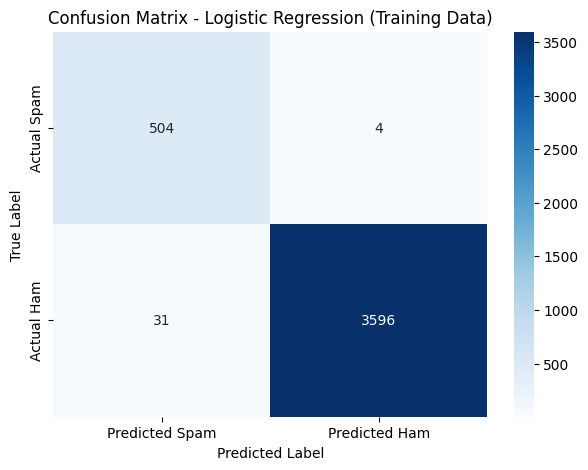

In [32]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, prediction_trainingLR_data)

# Visualize the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Spam', 'Predicted Ham'],
            yticklabels=['Actual Spam', 'Actual Ham'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression (Training Data)')
plt.show()


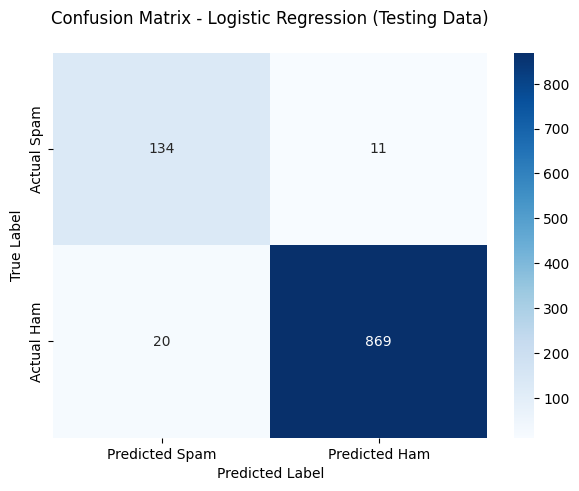

In [33]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, prediction_testLR_data)

# Visualize the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Spam', 'Predicted Ham'],
            yticklabels=['Actual Spam', 'Actual Ham'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression (Testing Data)\n')
plt.show()

#### **Naive Bayes**

In [34]:
evaluate_model(SmSModel, x_test_count, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       145
           1       0.98      0.99      0.99       889

    accuracy                           0.98      1034
   macro avg       0.97      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034


ROC AUC Score: 0.9477871300570188


In [35]:
# Training Accuracy
prediction_trainingNB_data = SmSModel.predict(x_train_count)
accuracy_trainingNB_data = accuracy_score(y_train, prediction_trainingNB_data)
print(accuracy_trainingNB_data)

0.9920193470374848


In [36]:
# Testing Accuracy
prediction_testNB_data = SmSModel.predict(x_test_count)
accuracy_testNB_data = accuracy_score(y_test, prediction_testNB_data)
print(accuracy_testNB_data)

0.9796905222437138


- Ensuring that the Naive Bayes model is not overfitting 

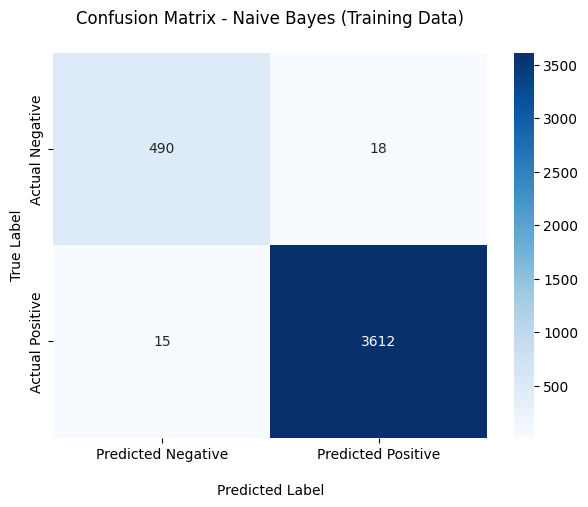

In [37]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, prediction_trainingNB_data)

# Visualize
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('\nPredicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes (Training Data)\n')
plt.show()

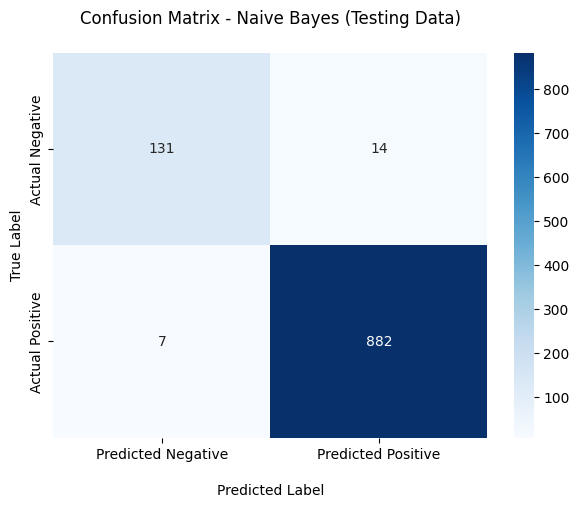

In [38]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, prediction_testNB_data)

# Visualize
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('\nPredicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes (Testing Data)\n')
plt.show()

## ✅ **Model Testing**

In [39]:
def showResult(pred):
    print("Result :")
    if(pred==1):
        print('Ham SMS')
    else:
        print('Spam SMS')

#### **LogisticRegression**

In [40]:
# Input an SMS you wanna test !
#Testing with Ham sms
input_SMS_message = ["Hey, are we still meeting for lunch today?"]
input_data_features = feature_extraction.transform(input_SMS_message)
prediction = SmsModel.predict(input_data_features)
showResult(prediction)

Result :
Ham SMS


In [41]:
# Input an SMS you wanna test !
#Testing with Spam sms
input_SMS_message = ["Congratulations! You've won a $1,000 gift card. Click the link to claim your prize now: http://bit.ly/abcdefg"]
input_data_features = feature_extraction.transform(input_SMS_message)
prediction = SmsModel.predict(input_data_features)
showResult(prediction)

Result :
Spam SMS


#### **Naive Bayes**

In [42]:
# preTest HAM
SMS_ham =["This is a reminder for your dental appointment on June 15th at 3 PM."]
SMS_ham_count = cv.transform(SMS_ham)
prediction = SmSModel.predict(SMS_ham_count)
showResult(prediction)

Result :
Ham SMS


In [43]:
# preTest SPAM
SMS_spam =["Your account has been temporarily suspended due to suspicious activity. Verify your account immediately at http://fakebanklink.com"]
SMS_spam_count=cv.transform(SMS_spam)
prediction = SmSModel.predict(SMS_spam_count)
showResult(prediction)

Result :
Spam SMS
